# Generalized Search

In [3]:
!pip3 install biopython

     |████████████████████████████████| 2.7 MB 2.6 MB/s eta 0:00:01


In [4]:
import re, csv
from Bio import SeqIO

In [22]:
#Personal Adjustments, sorted by number of matches
def ExtraFastatoCSV (fasta_file, motif_arg):
    handle = open(fasta_file, "r")
    counter =0
    with open ("FO_motif_search.csv", "w") as newcsv:
        writer = csv.writer(newcsv)
        header = ['Protein ID', 'Motifs', 'Area', 'Positions', 'Number of Matches']
        writer.writerow(header)
        motif_input = motif_arg
        sort_cont = {}
        for protein in SeqIO.parse(handle, "fasta"):
            prowriter = csv.writer(newcsv, delimiter=',', quotechar='"')
            motif_row = Updated_FindMotif(motif_input, str(protein.seq))
            if motif_row[3]!=0:
                sort_cont[protein.id] = motif_row
        sorted(sort_cont)
        for keys in sort_cont:
            prowriter.writerow([keys, sort_cont[keys][0], sort_cont[keys][1] ,sort_cont[keys][2],sort_cont[keys][3]])
    newcsv.close()
    handle.close()
    print("Complete. There are "+str(len(sort_cont))+" matches.")


#basic/acidic, additional amino acids, 
def Updated_FindMotif(motif,seq):

    motif_clean = re.sub("X", "\\\w", motif)
    motif_clean = re.sub("-", "", motif_clean)
    motif_clean = re.sub("x", "\\\w", motif_clean)
    motif_clean = re.sub("\n", "", motif_clean)
    motif_clean = re.sub("\*", ".", motif_clean)
    
    #Acid/Base
    motif_clean = re.sub("base", "[KRH]", motif_clean)
    motif_clean = re.sub("acid", "[DE]", motif_clean)
    
    
    needle = re.compile(str(motif_clean))
    if needle.findall(seq):
        group_matches=[]
        position_matches=[]
        area=[]
        for match in needle.finditer(seq):
            group_matches.append(match.group(0))
            if match.start(0)-2<0:
                area.append(seq[0:match.start(0)+len(motif_clean)])
            elif match.start(0)+len(motif_clean)+2>len(seq):
                area.append(seq[match.start(0)-2:len(seq)])
            else:
                area.append(seq[match.start(0)-2:match.end(0)+2])
            position_matches.append(match.start(0)+1)
            #print("Position matches found.")
        return (group_matches, area, position_matches, len(group_matches))
    else:
        return (["NA"], ["NA"], ["NA"], 0)

    
#Acid/Base test and Restrictions
#print("Please input base for any basic residue or acid for any acidic residue.") #restrictions
#print(Updated_FindMotif('ABCacid', 'ABCDEFGHIJKLMNOPQRSTUVWXYZLMA')) #test using D)

fasta_input = input("Input the FASTA file name:")
motif_input = input("Input the motif:")

ExtraFastatoCSV(fasta_input, motif_input)

Input the FASTA file name:Vlogisporum.fasta
Input the motif:SP*K
Complete. There are 4114 matches.


# Below is specified for FoCdc14 search for SP*K

In [23]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [24]:
#Personal Adjustments, sorted by number of matches
def FastatoDict (fasta_file):
    handle = open(fasta_file, "r")
    counter =0
    motif_input = 'SP*K'#Change this for different search
    sort_cont = {}
    for protein in SeqIO.parse(handle, "fasta"):
        motif_row = Updated_FindMotif(motif_input, str(protein.seq))
        if motif_row[3]!=0:
            sort_cont[protein.id] = motif_row
            counter +=1
    sorted(sort_cont)
    handle.close()
    print("Complete. There are "+str(counter)+" matches.")
    return sort_cont


#basic/acidic, additional amino acids, 
def Updated_FindMotif(motif,seq):

    motif_clean = re.sub("X", "\\\w", motif)
    motif_clean = re.sub("-", "", motif_clean)
    motif_clean = re.sub("x", "\\\w", motif_clean)
    motif_clean = re.sub("\n", "", motif_clean)
    motif_clean = re.sub("\*", ".", motif_clean)
    
    #Acid/Base
    motif_clean = re.sub("base", "[KRH]", motif_clean)
    motif_clean = re.sub("acid", "[DE]", motif_clean)
    
    
    needle = re.compile(str(motif_clean))
    if needle.findall(seq):
        group_matches=[]
        position_matches=[]
        area=[]
        for match in needle.finditer(seq):
            group_matches.append(match.group(0))
            if match.start(0)-2<0:
                area.append(seq[0:match.start(0)+len(motif_clean)])
            elif match.start(0)+len(motif_clean)+2>len(seq):
                area.append(seq[match.start(0)-2:len(seq)])
            else:
                area.append(seq[match.start(0)-2:match.end(0)+2])
            position_matches.append(match.start(0)+1)
            #print("Position matches found.")
        return (group_matches, area, position_matches, len(group_matches))
    else:
        return (["NA"], ["NA"], ["NA"], 0)

    
fasta_input = input("Input the FASTA file name:")
graph_dict = FastatoDict(fasta_input)#Autosearches for SP*K and gives for data analysis using dictionary

Input the FASTA file name:Vlogisporum.fasta
Complete. There are 4114 matches.


In [25]:
protein_id2 = []
motifs2 = []
area2 = []
positions2 = []
matchNumber2 = []

for key in graph_dict.keys():
    protein_id2.append(key)
    for each in graph_dict[key][0]:
        motifs2.append(each)
    for each in graph_dict[key][1]:
        area2.append(each)
    for each in graph_dict[key][2]:
        positions2.append(each)
    matchNumber2.append(graph_dict[key][3])

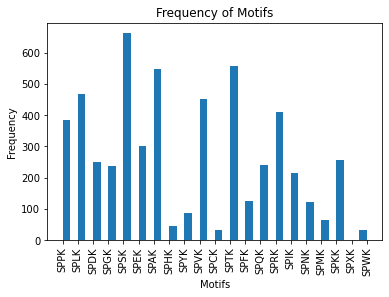

In [26]:
plt.figure()
plt.hist(motifs2, bins=40)
plt.title("Frequency of Motifs")
plt.ylabel("Frequency")
plt.xlabel("Motifs")
plt.xticks(rotation=90)
plt.show()

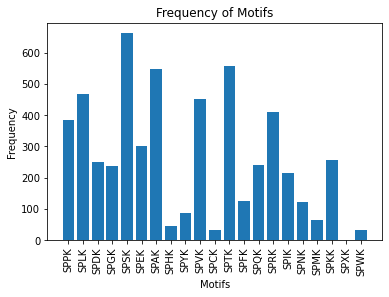

In [27]:
motif2_dict = {}
for i in range(len(motifs2)):
    if motifs2[i] in motif2_dict:
        motif2_dict[motifs2[i]] +=1
    else:
        motif2_dict[motifs2[i]] =1
    
plt.figure()
plt.bar(motif2_dict.keys(), motif2_dict.values())
plt.title("Frequency of Motifs")
plt.ylabel("Frequency")
plt.xlabel("Motifs")
plt.xticks(rotation=90)
plt.show()

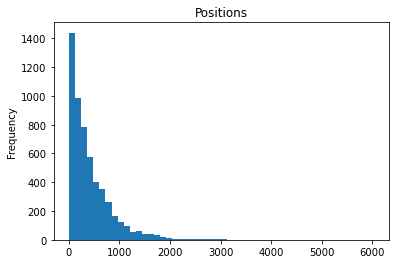

In [28]:
plt.figure()
plt.hist(positions2, bins=50)
plt.title("Positions")
plt.ylabel("Frequency")
plt.show()

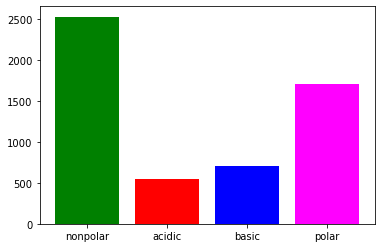

In [30]:
nonpolar = ['A','G','I','L','M','F','P','W','V']
basic = ['R','H','K']
acidic = ['D','E']

nonpolar_count2 = 0
acidic_count2 = 0
basic_count2 = 0
other_count2 = 0

for i in range(len(motifs2)):
    wildcard2 = motifs2[i][2]
    if wildcard2 in nonpolar:
        nonpolar_count2 += 1
    elif wildcard2 in acidic:
        acidic_count2 += 1
    elif wildcard2 in basic:
        basic_count2 += 1
    else:
        other_count2 += 1
        
plt.figure()
plt.bar('nonpolar', nonpolar_count2, color='green')
plt.bar('acidic', acidic_count2, color='red')
plt.bar('basic', basic_count2, color='blue')
plt.bar('polar', other_count2, color='magenta')
plt.show()

In [31]:
info = []
with open ("FO_motif_search.csv", "r") as foCsvFile:#Must give name of .csv that you are using
    dataReader = csv.reader(foCsvFile)
    for each in dataReader:
        info.append(each)
foCsvFile.close()

protein_id = []
motifs = []
area = []
position = []
matchNumber = []

for i in range(1, len(info)):
    for j in range(int(info[i][4])):
        matchNumber.append(int(info[i][4]))
    for j in range(matchNumber[i-1]):
        protein_id.append(info[i][0])
    motemp = re.split(r'\W+', info[i][1])
    for each in motemp:
        if each !='':
            motifs.append(each)
    atemp = re.split(r'\W+', info[i][2])
    for each in atemp:
        if each !='':
            area.append(each)
    ptemp = re.split(r'\W+', info[i][3])
    for each in ptemp:
        if each !='':
            position.append(int(each))

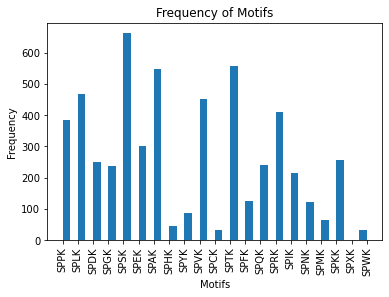

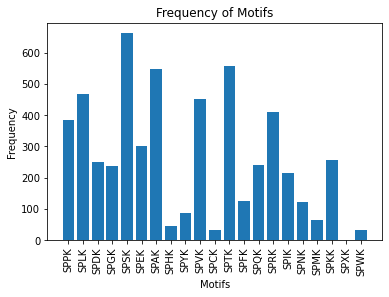

In [32]:
plt.figure()
plt.hist(motifs, bins=40)
plt.title("Frequency of Motifs")
plt.ylabel("Frequency")
plt.xlabel("Motifs")
plt.xticks(rotation=90)
plt.show()

motif_dict = {}
for i in range(len(motifs)):
    if motifs[i] in motif_dict:
        motif_dict[motifs[i]] +=1
    else:
        motif_dict[motifs[i]] =1
    
plt.figure()
plt.bar(motif_dict.keys(), motif_dict.values())
plt.title("Frequency of Motifs")
plt.ylabel("Frequency")
plt.xlabel("Motifs")
plt.xticks(rotation=90)
plt.show()

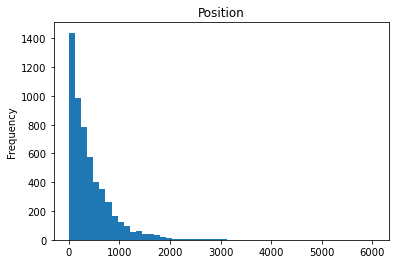

In [33]:
plt.figure()
plt.hist(position, bins=50)
plt.title("Position")
plt.ylabel("Frequency")
plt.show()

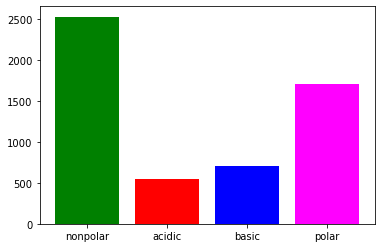

In [35]:
nonpolar = ['A','G','I','L','M','F','P','W','V']
basic = ['R','H','K']
acidic = ['D','E']

nonpolar_count = 0
acidic_count = 0
basic_count = 0
other_count = 0

for i in range(len(motifs)):
    wildcard = motifs[i][2]
    if wildcard in nonpolar:
        nonpolar_count += 1
    elif wildcard in acidic:
        acidic_count += 1
    elif wildcard in basic:
        basic_count += 1
    else:
        other_count += 1

plt.figure()
plt.bar('nonpolar', nonpolar_count, color='green')
plt.bar('acidic', acidic_count, color='red')
plt.bar('basic', basic_count, color='blue')
plt.bar('polar', other_count, color='magenta')
plt.show()

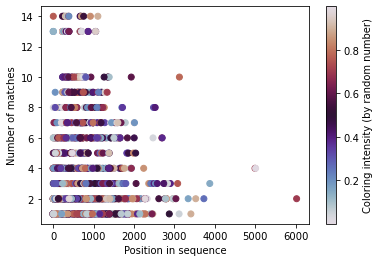

In [36]:
random_numbers = np.random.rand(len(position))#just random, can be changed

plt.figure()
plt.scatter(position, matchNumber, c=random_numbers, cmap='twilight')
cbar = plt.colorbar()
cbar.set_label("Coloring intensity (by random number)")
plt.xlabel("Position in sequence")
plt.ylabel("Number of matches")
plt.show()